In [1]:
# You may need to install scikit-plot for the evaluatioin cells as it is not part of Anaconda
# %pip install scikit-plot

# Regression
We now move on to regression for predicting numerical values

In [2]:
import pandas as pd
import numpy as np

dfPlayers = pd.read_csv('../Data/player_info.csv')
dfPlayers = dfPlayers[dfPlayers['primaryPosition'] == 'G']
dfPlayers.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
7,8470645,Corey,Crawford,CAN,Montreal,G,1984-12-31 00:00:00,QC,"6' 2""",187.96,216.0,L
14,8473461,Steve,Mason,CAN,Oakville,G,1988-05-29 01:00:00,ON,"6' 4""",193.04,210.0,R
21,8473607,Michal,Neuvirth,CZE,Ústí nad Labem,G,1988-03-23 00:00:00,NaN,"6' 1""",185.42,209.0,L
47,8475215,Robin,Lehner,SWE,Gothenburg,G,1991-07-24 01:00:00,NaN,"6' 4""",193.04,245.0,L
70,8468011,Ryan,Miller,USA,East Lansing,G,1980-07-17 01:00:00,MI,"6' 3""",190.50,173.0,L


In [3]:
dfGoalieStats = pd.read_csv('../Data/game_goalie_stats.csv')
dfGoalieStats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2018020001,8471679,8,3661,0,0,0,26,23,3,0,20,0,22,4,L,88.461538,75.000000,90.909091
1,2018020001,8475883,10,3661,0,0,0,36,34,5,0,29,0,30,6,W,94.444444,83.333333,96.666667
2,2018020002,8470860,6,1952,0,0,0,18,16,5,4,7,4,8,6,NaN,88.888889,83.333333,87.500000
3,2018020002,8471695,6,1648,0,0,0,19,14,1,0,13,0,15,4,L,73.684211,25.000000,86.666667
4,2018020002,8474651,15,3596,1,0,0,25,25,2,3,20,3,20,2,W,100.000000,100.000000,100.000000


In [4]:
# Calculate goals against based on shots faced and savePercentage
dfGoalieStats['goalsAgainst'] = (100 - dfGoalieStats['savePercentage']) / 100 * dfGoalieStats['shots']
dfGoalieStats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,goalsAgainst
0,2018020001,8471679,8,3661,0,0,0,26,23,3,0,20,0,22,4,L,88.461538,75.000000,90.909091,3.0
1,2018020001,8475883,10,3661,0,0,0,36,34,5,0,29,0,30,6,W,94.444444,83.333333,96.666667,2.0
2,2018020002,8470860,6,1952,0,0,0,18,16,5,4,7,4,8,6,NaN,88.888889,83.333333,87.500000,2.0
3,2018020002,8471695,6,1648,0,0,0,19,14,1,0,13,0,15,4,L,73.684211,25.000000,86.666667,5.0
4,2018020002,8474651,15,3596,1,0,0,25,25,2,3,20,3,20,2,W,100.000000,100.000000,100.000000,0.0


In [5]:
dfStats = dfGoalieStats.drop(columns=['game_id', 'team_id', 'decision','saves','powerPlaySaves','shortHandedSaves','evenSaves','shots', 'powerPlaySavePercentage','evenStrengthSavePercentage','assists','pim'])
dfStats = dfStats.groupby(['player_id']).mean()
dfStats.head()

,timeOnIce,goals,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,goalsAgainst
player_id,,,,,,,
8466141,3274.372093,0.0,0.976744,24.488372,2.558140,89.092417,2.837209
8467950,3342.220000,0.0,0.900000,28.060000,4.560000,89.129391,3.260000
8468011,3326.400000,0.0,0.600000,23.450000,4.850000,91.159142,2.550000
8468685,3454.314815,0.0,0.777778,26.111111,4.814815,89.830847,2.962963
8469514,1435.000000,0.0,0.333333,7.666667,3.000000,78.841042,2.000000


In [6]:
dfPlayerStats = pd.merge(dfPlayers, dfStats, on='player_id')
dfPlayerStats.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches,timeOnIce,goals,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,goalsAgainst
0,8470645,Corey,Crawford,CAN,Montreal,G,1984-12-31 00:00:00,QC,"6' 2""",187.96,216.0,L,3404.384615,0.0,0.641026,25.025641,4.487179,90.560991,2.769231
1,8473607,Michal,Neuvirth,CZE,Ústí nad Labem,G,1988-03-23 00:00:00,NaN,"6' 1""",185.42,209.0,L,3134.000000,0.0,0.857143,21.142857,4.285714,84.205461,3.714286
2,8475215,Robin,Lehner,SWE,Gothenburg,G,1991-07-24 01:00:00,NaN,"6' 4""",193.04,245.0,L,3405.351852,0.0,0.796296,24.203704,3.814815,92.403191,2.000000
3,8468011,Ryan,Miller,USA,East Lansing,G,1980-07-17 01:00:00,MI,"6' 3""",190.50,173.0,L,3326.400000,0.0,0.600000,23.450000,4.850000,91.159142,2.550000
4,8473575,Semyon,Varlamov,RUS,Samara,G,1988-04-27 01:00:00,NaN,"6' 2""",187.96,209.0,L,3476.571429,0.0,0.673469,24.387755,5.469388,90.183863,2.775510


In [7]:
dfPlayerStats.columns

Index(['player_id', 'firstName', 'lastName', 'nationality', 'birthCity',
       'primaryPosition', 'birthDate', 'birthStateProvince', 'height',
       'height_cm', 'weight', 'shootsCatches', 'timeOnIce', 'goals',
       'shortHandedShotsAgainst', 'evenShotsAgainst', 'powerPlayShotsAgainst',
       'savePercentage', 'goalsAgainst'],
      dtype='object')

In [8]:
# Feature engineering: Let's add an Age column based on the year of birth and the current year in the data (2018)
dfPlayerStats['Age'] = 2018 - dfPlayerStats['birthDate'].str[:4].astype(int)
dfPlayerStats.sort_values('Age')['Age'].value_counts()

Age
28    9
25    9
26    9
32    7
30    7
24    7
23    6
22    6
29    5
31    5
34    4
36    4
27    3
33    3
35    3
20    2
38    1
19    1
37    1
39    1
Name: count, dtype: int64

In [9]:
import plotly.express as px

# Specify defaults for Plotly settings
px.defaults.color_continuous_scale = px.colors.sequential.Agsunset
px.defaults.color_discrete_sequence = px.colors.qualitative.Prism
#px.defaults.template = 'plotly_dark'
px.defaults.template = 'plotly_white'

In [10]:
px.histogram(dfPlayerStats.sort_values('Age'), 
             x='Age', 
             title='Age Distribution of Goalies')

In [11]:
px.box(dfPlayerStats, x='goalsAgainst', title='Average Goals Against', hover_data=['firstName', 'lastName'], points='all')

In [12]:
px.box(dfPlayerStats, x='savePercentage', title='Average Save %', hover_data=['firstName', 'lastName'], points='all')

In [13]:
px.box(dfPlayerStats, x='timeOnIce', title='Average Time on Ice', hover_data=['firstName', 'lastName'], points='all')

In [14]:
dfPlayerStats = dfPlayerStats.drop(columns=['player_id', 'firstName', 'lastName', 'height','nationality', 'birthCity', 'birthStateProvince','birthDate'])

In [15]:
dfPlayerStats.columns

Index(['primaryPosition', 'height_cm', 'weight', 'shootsCatches', 'timeOnIce',
       'goals', 'shortHandedShotsAgainst', 'evenShotsAgainst',
       'powerPlayShotsAgainst', 'savePercentage', 'goalsAgainst', 'Age'],
      dtype='object')

In [16]:
dfPlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   primaryPosition          93 non-null     object 
 1   height_cm                93 non-null     float64
 2   weight                   93 non-null     float64
 3   shootsCatches            92 non-null     object 
 4   timeOnIce                93 non-null     float64
 5   goals                    93 non-null     float64
 6   shortHandedShotsAgainst  93 non-null     float64
 7   evenShotsAgainst         93 non-null     float64
 8   powerPlayShotsAgainst    93 non-null     float64
 9   savePercentage           93 non-null     float64
 10  goalsAgainst             93 non-null     float64
 11  Age                      93 non-null     int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 8.8+ KB


In [17]:
dfPlayerStats['shootsCatches'].value_counts()

shootsCatches
L    86
R     6
Name: count, dtype: int64

In [18]:
dfPlayerStats['CatchesRight'] = dfPlayerStats['shootsCatches'] == 'R'
dfPlayerStats['CatchesRight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 93 entries, 0 to 92
Series name: CatchesRight
Non-Null Count  Dtype
--------------  -----
93 non-null     bool 
dtypes: bool(1)
memory usage: 225.0 bytes


In [19]:
dfPlayerStats = dfPlayerStats.drop(columns=['shootsCatches', 'primaryPosition', 'goals'])

## Correlation Analysis

In [20]:
corr = dfPlayerStats.corr()

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

import plotly.graph_objects as go

# Create a masked correlation matrix
masked_corr = corr.mask(mask)
#masked_corr = masked_corr.iloc[::-1,::-1]

heat = go.Heatmap(z=masked_corr,
                  x=dfPlayerStats.columns,
                  y=dfPlayerStats.columns,
                  xgap=1, ygap=1,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                   )


title = 'Correlation Matrix'               

layout = go.Layout(title_text=title, title_x=0.5, 
                   height=800,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)        
fig.show() 

## Test / Train Split

In [21]:
# Identify features (X) and label (y)
X = dfPlayerStats.drop(columns=['goalsAgainst']) # These are our features - they factor into what the value of label should be
y = dfPlayerStats['goalsAgainst'] # This is our label - the thing we're trying to predict

In [22]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Fitting

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Algorithm options
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

# Select a model trainer
#model = DecisionTreeClassifier()
model = RandomForestRegressor()
#model = LinearRegression()

# Create a pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()), 
    ('model', model)
])

# Actually train our model
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

## Model Evaluation

In [24]:
# Evaluate the model with regression metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.13673687683467653
R^2 Score: 0.7151598788871902
Mean Absolute Error: 0.2639525734790795


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

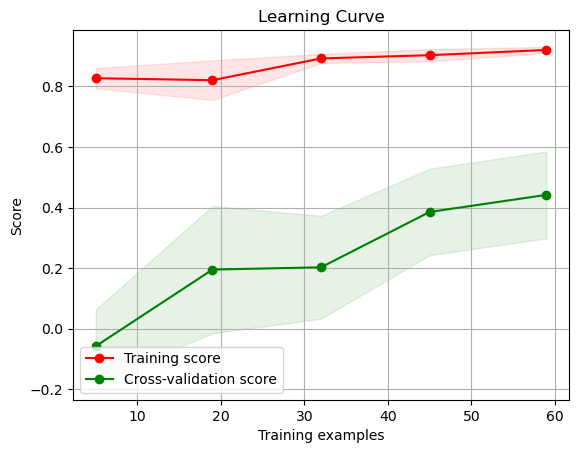

In [25]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(pipe, X_train, y_train, title='Learning Curve', cv=5, scoring='r2')

## Feature Importance

In [26]:
# Calculate feature importance for our model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

# Plot the feature importances using plotly.express
px.bar(x=X.columns[indices], y=importances[indices], title='Top Features by Importance', color=importances[indices], labels={'x': 'Feature', 'y': 'Importance'}, orientation='v')

<Axes: title={'center': 'Feature Importance'}>

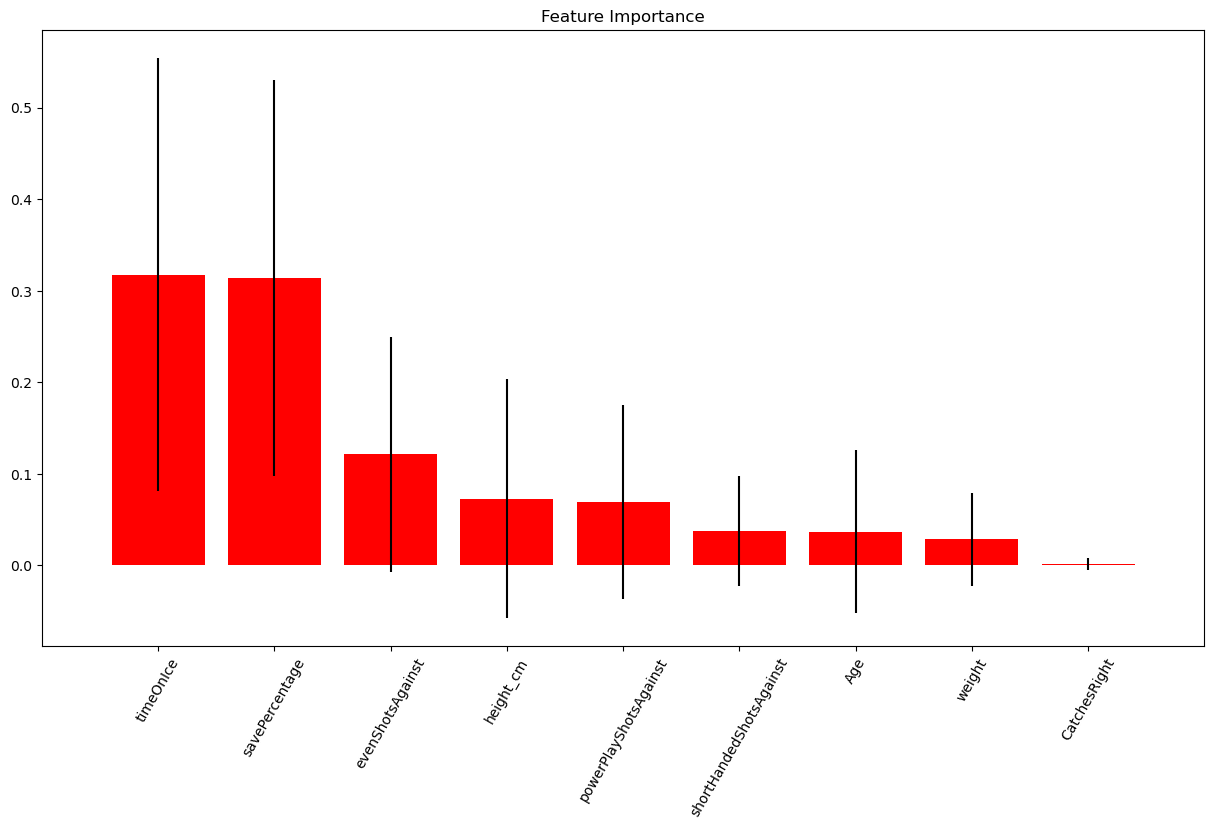

In [27]:
# Scikit plot classification
import scikitplot as skplt

skplt.estimators.plot_feature_importances(pipe.named_steps['model'], feature_names=X.columns, figsize=(15, 8), x_tick_rotation=60)

## Generating Predictions

In [28]:
X_test.head(1)

,height_cm,weight,timeOnIce,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,Age,CatchesRight
40,190.5,217.0,3274.372093,0.976744,24.488372,2.55814,89.092417,39,False


In [29]:
X_test.columns

Index(['height_cm', 'weight', 'timeOnIce', 'shortHandedShotsAgainst',
       'evenShotsAgainst', 'powerPlayShotsAgainst', 'savePercentage', 'Age',
       'CatchesRight'],
      dtype='object')

In [30]:
# Create a sample player to test the model
sample_player = pd.DataFrame({
    'height_cm': [180],
    'weight': [180],
    'timeOnIce': [90],
    'shortHandedShotsAgainst': [3],
    'evenShotsAgainst': [22],
    'powerPlayShotsAgainst': [5],
    'savePercentage': [0.9],
    'Age': [25],
    'CatchesRight': [True]
})

# Predict the goals against
pipe.predict(sample_player)

array([3.59176672])

In [31]:
pipe.predict(X_test.sample(5))

array([4.44185778, 2.7163497 , 1.23503398, 2.74949255, 4.19377652])

In [32]:
# Save our model to disk
import joblib

joblib.dump(pipe, 'nhl_goalsagainst_model.pkl')

['nhl_goalsagainst_model.pkl']